In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [121]:
#add column name to the dataset
column_name = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']

In [122]:
# Load the dataset from a CSV file
mydata = pd.read_csv('iris.csv',names=column_name)

In [123]:
mydata.head(10) #shows the first 10 rows from the data set table

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [124]:
# Return some statistical description of the dataset
mydata.describe()


,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


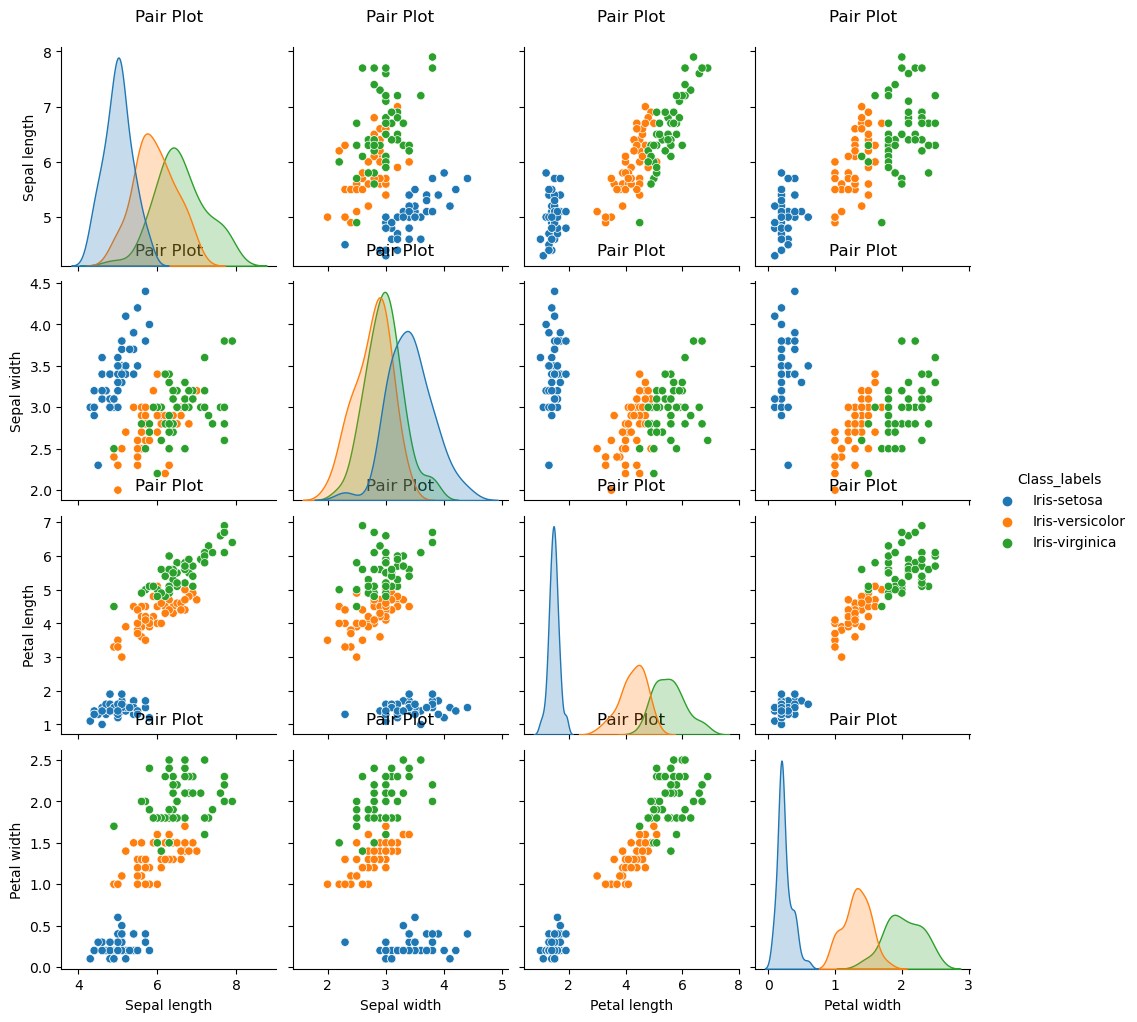

In [143]:
# Visualizing the iris dataset 
sns.pairplot(df, hue='Class_labels').set(title='Pair Plot\n')


In [126]:
# Seperating features and target  
d = mydata.values
X = d[:,0:4]
Y = d[:,4]


In [127]:
# Calculate Average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(column_name)-1)
width = 0.25

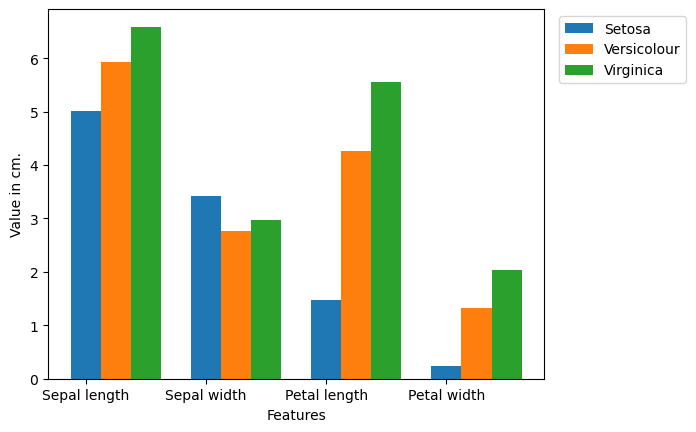

In [128]:
# Plot the avarage
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [129]:
# Split the dataset into a training dataset and a test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [130]:
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [131]:
# Creating a logistic regression model
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

In [132]:
# Train the model on the training dataset
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [134]:
# Make predictions on the test dataset
Y_pred = model.predict(X_test)

In [135]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [136]:
#classification report based on test data set
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [137]:
# Save the trained model to a file using pickle
model_filename = 'IrisFlower_Classification.pkl'  # Choose a filename
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

In [142]:
# To test the saved model on new data and load the saved model from the file
model_filename = 'IrisFlower_Classification.pkl'  # Use the same filename as in the training script
with open(model_filename, 'rb') as file:
    model = pickle.load(file)